In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/retail_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure and contents
data.head()

,Age,Annual Spending (1000s),Visit Frequency,Items per Visit,Loyalty Score
0,62,112,33,2,2
1,65,50,2,4,6
2,18,32,2,4,2
3,21,40,37,2,2
4,21,29,26,4,9


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min

# Re-loading the dataset since the code execution state was reset
file_path = '/content/retail_data.csv'
data = pd.read_csv(file_path)

# Function to initialize centroids
def initialize_centroids(X, k):
    """Randomly initialize centroids from the data points"""
    indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[indices]
    return centroids

# Function to assign clusters
def assign_clusters(X, centroids):
    """Assign data points to the nearest centroid"""
    closest, _ = pairwise_distances_argmin_min(X, centroids)
    return closest

# Function to recompute centroids
def recompute_centroids(X, labels, k):
    """Recompute the centroids based on data points assigned to each cluster"""
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

# Function for K-Means clustering
def k_means(X, k, max_iters=100):
    """Perform K-Means clustering"""
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = recompute_centroids(X, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Performing K-Means clustering
k = 5  # Number of clusters
centroids, labels = k_means(data_scaled, k)

# Adding cluster labels to the original data
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = labels

data_with_clusters.head()

,Age,Annual Spending (1000s),Visit Frequency,Items per Visit,Loyalty Score,Cluster
0,62,112,33,2,2,1
1,65,50,2,4,6,3
2,18,32,2,4,2,2
3,21,40,37,2,2,2
4,21,29,26,4,9,2


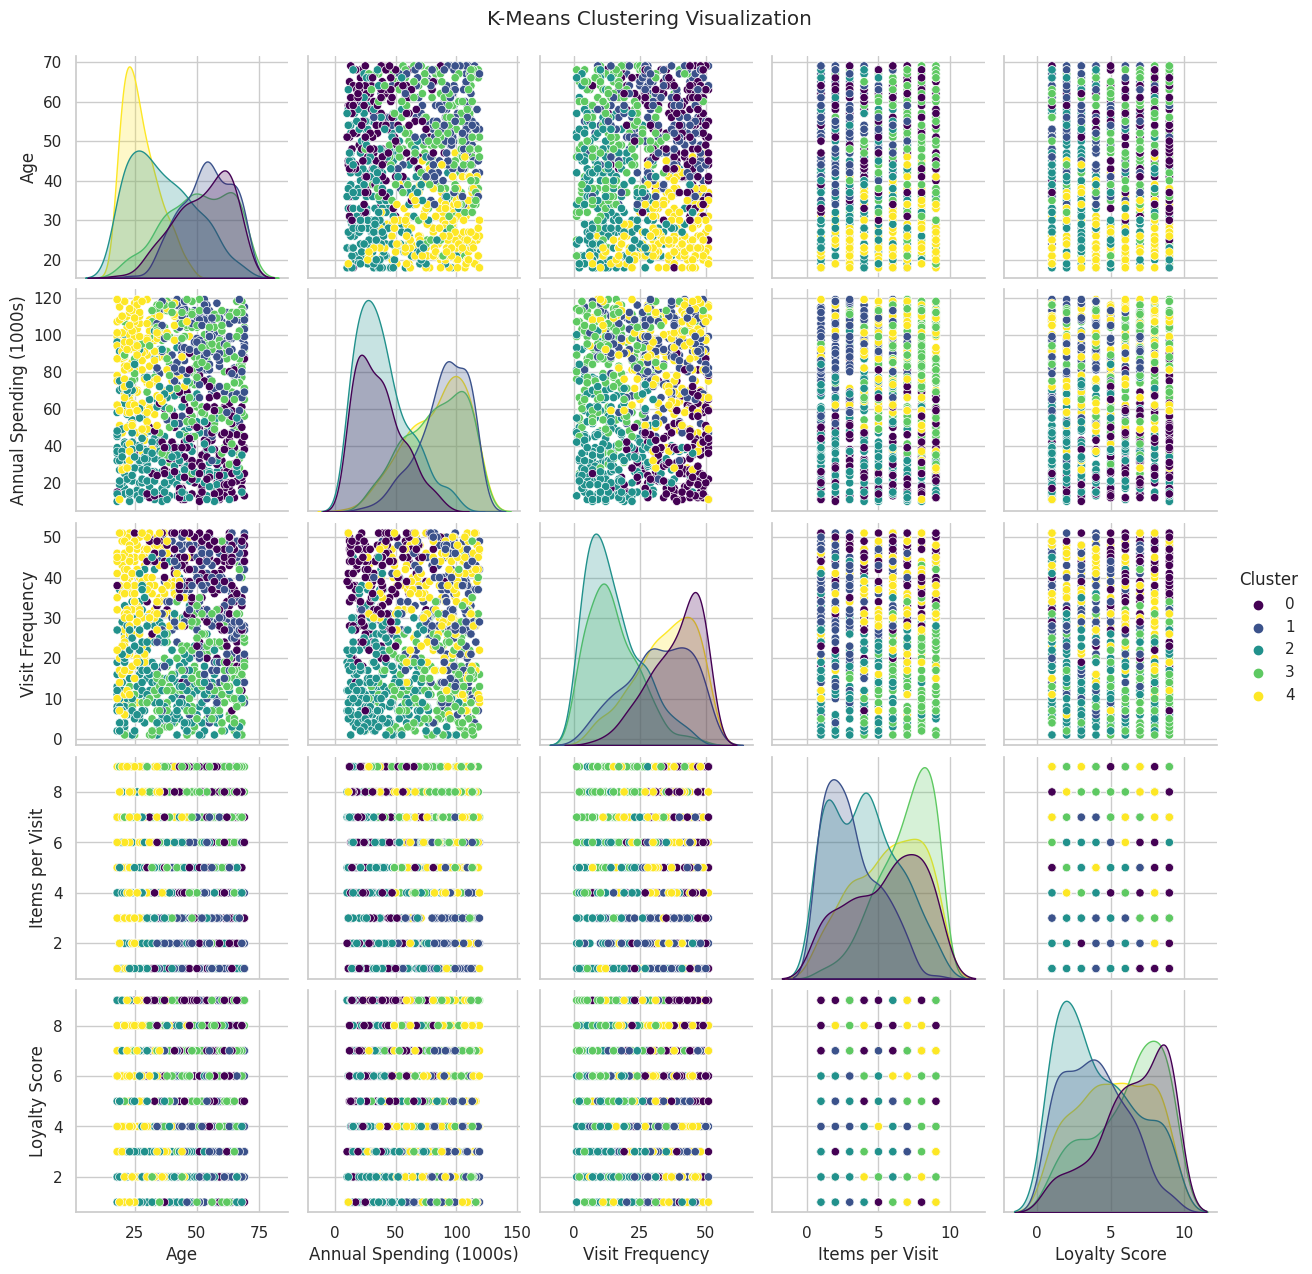

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a pairplot to visualize the clusters
pairplot = sns.pairplot(data_with_clusters, hue='Cluster', palette='viridis',
                        vars=['Age', 'Annual Spending (1000s)', 'Visit Frequency', 'Items per Visit', 'Loyalty Score'])

pairplot.fig.suptitle("K-Means Clustering Visualization", y=1.02)  # Adjusting the title position
plt.show()

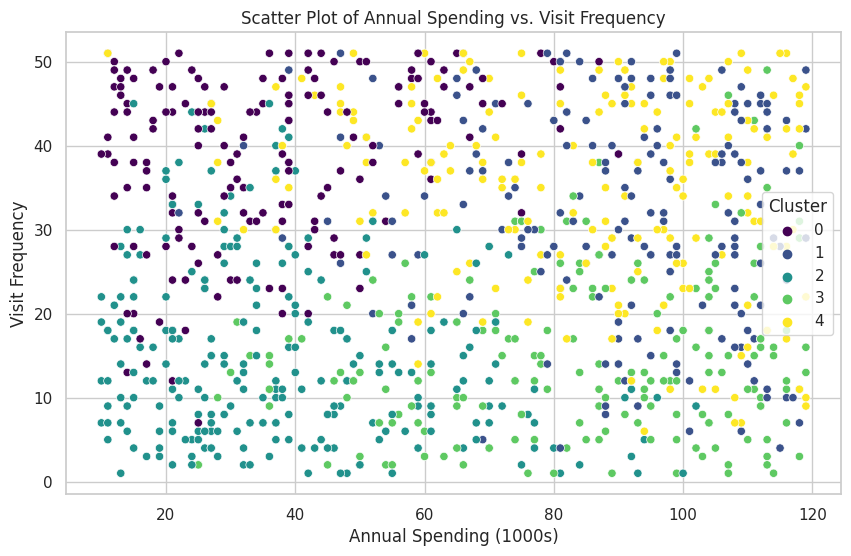

In [5]:
# Generating a scatter plot for two of the features along with the cluster classification
plt.figure(figsize=(10, 6))

# Choosing 'Annual Spending (1000s)' and 'Visit Frequency' for the scatter plot
sns.scatterplot(data=data_with_clusters, x='Annual Spending (1000s)', y='Visit Frequency', hue='Cluster', palette='viridis')

plt.title('Scatter Plot of Annual Spending vs. Visit Frequency')
plt.xlabel('Annual Spending (1000s)')
plt.ylabel('Visit Frequency')
plt.legend(title='Cluster')
plt.show()